# Timeseries Forecasting Model for Female Births 

In [195]:
import pandas as pd
from pandas import Series
from pandas import TimeGrouper
from pandas.plotting import autocorrelation_plot
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA

### Load Dataset (daily-total-female-births.csv)

In [137]:
#Load the Dataset
df = pd.read_csv('daily-total-female-births.csv',header=0, parse_dates=[0],index_col=0, squeeze=True)


In [138]:
# Let's take a peek at the data
df.head()
df.tail()

Date
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Births, dtype: int64

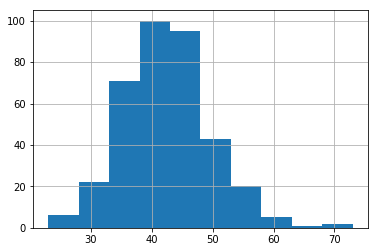

In [92]:
#Histogram of the data
df.hist(bins=10)

In [139]:
#describing the data
df.describe()
# There are 365 records
# min birth rate per day is 23
# max birth rate per day is 73

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64

In [140]:
#Number of Observations
df.size

365

In [95]:
#Extracting Birth Data for the month of January 1950
df['1959-01']


Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: Births, dtype: int64

# Visualizing Data

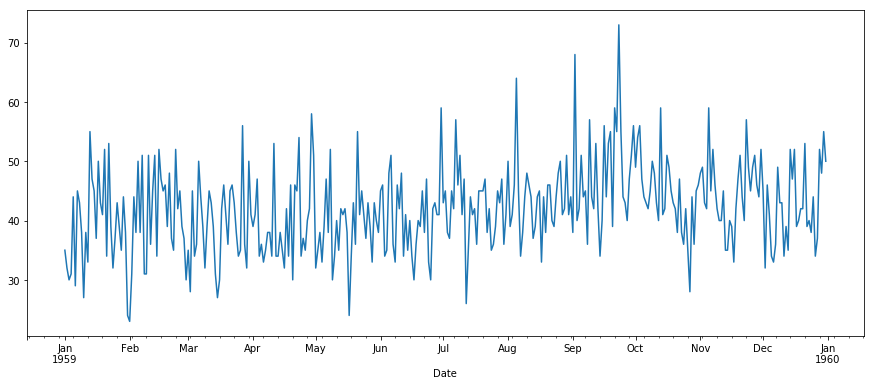

In [141]:
#timeseries plot
df.plot(figsize=(15,6))
plt.show()


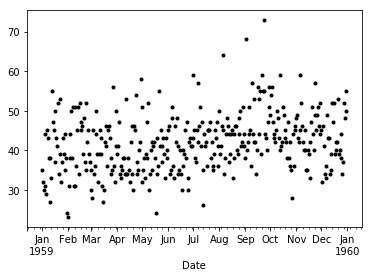

In [97]:
# Dot plot of the data
df.plot(style='k.')
plt.show()

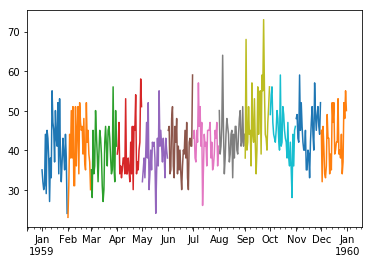

In [98]:
df.resample('M').plot()
plt.show()


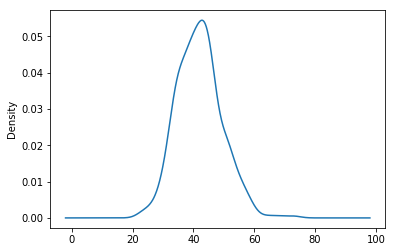

In [99]:
#Denisty plot
df.plot(kind='kde')
plt.show()

# Baseline Forecasting Model
#### Baseline in forecast provides a point of comparison. Persistence Algorithm is a common Baseline algorithm.
#### We will use the following steps to perform baseline
#### 1.Transform the univariate dataset into a supervised learning problem.
#### 2. Establish the train and test datasets for the test harness.
#### 3. Define the persistence model.
#### 4. Make a forecast and establish a baseline performance.
#### 5. Review the complete example and plot the output.

In [144]:
values = pd.DataFrame(df.values)
lagged_ds = pd.concat([values.shift(1),values],axis=1)
lagged_ds.columns = ['t-1','t']

### Train and Test Dataset

In [167]:
# split into train and test sets
X = lagged_ds.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

## Persistence Algorithm

In [166]:
# persistence model
def model_persistence(x):
    return x
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test Mean Squared Error: %.3f' % test_score)

Test Mean Squared Error: 83.744


In [202]:
# Fit regression model
train_X = train_X.reshape(-1,1)
train_y = train_y.reshape(-1,1)
test_X = test_X.reshape(-1,1)

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(train_X, train_y)
regr_2.fit(train_X, train_y)
y_1 = regr_1.predict(test_X)
y_2 = regr_2.predict(test_X)
test_score = mean_squared_error(y_1, test_y)
print('Test Mean Squared Error with max_depth 2: %.3f' % test_score)
test_score = mean_squared_error(y_2, test_y)
print('Test Mean Squared Error with max_depth 5: %.3f' % test_score)



Test Mean Squared Error with max_depth 2: 70.071
Test Mean Squared Error with max_depth 5: 76.686


## Plot the Baseline Prediction

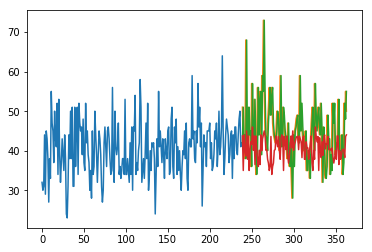

In [183]:
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y])

plt.plot([None for i in train_y] + [x for x in predictions])
plt.plot([None for i in train_y] + [x for x in y_2])

plt.show()

# Autocorrelation of Data
## We can check to see if there is an autocorrelation in the data

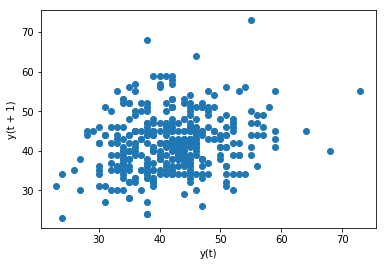

In [189]:
lag_plot(df)
pyplot.show()
# We see strong correlation only in the center and deteriorates for higher birth rates

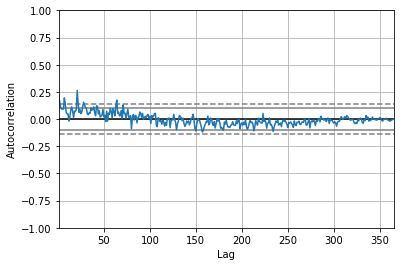

In [190]:
autocorrelation_plot(df)
plt.show()

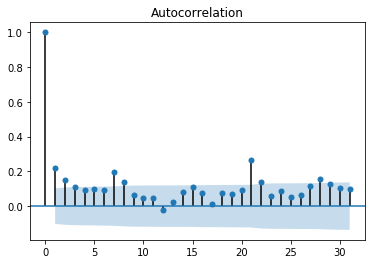

In [193]:
plot_acf(df, lags=31)
pyplot.show()
# Not much correlation in the data

# ARIMA Forecasting

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.Births   No. Observations:                  364
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1245.037
Method:                       css-mle   S.D. of innovations              7.392
Date:                Thu, 16 May 2019   AIC                           2504.073
Time:                        22:25:44   BIC                           2531.353
Sample:                    01-02-1959   HQIC                          2514.916
                         - 12-31-1959                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0434      0.125      0.348      0.728      -0.201       0.288
ar.L1.D.Births    -0.7240      0.052    -13.976      0.000      -0.826      -0.622
ar.L2.D.Births    -0.5430      0.063

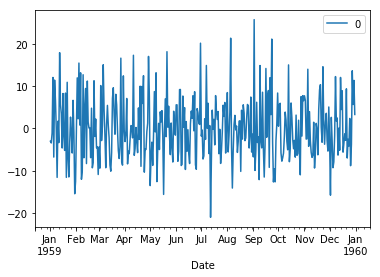

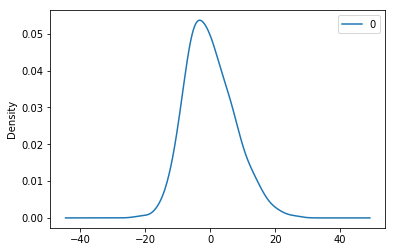

                0
count  364.000000
mean    -0.006509
std      7.404761
min    -21.067804
25%     -5.392352
50%     -0.899123
75%      4.803230
max     25.769530


In [198]:
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

# Rolling Forecast ARIMA model

predicted=43.908002, expected=51.000000
predicted=45.575063, expected=41.000000
predicted=44.488854, expected=44.000000
predicted=45.062429, expected=38.000000
predicted=40.758497, expected=68.000000
predicted=51.975879, expected=40.000000
predicted=49.021711, expected=42.000000
predicted=48.781811, expected=51.000000
predicted=45.051095, expected=44.000000
predicted=45.787394, expected=45.000000
predicted=46.489904, expected=36.000000
predicted=41.239361, expected=57.000000
predicted=46.757501, expected=44.000000
predicted=46.143023, expected=42.000000
predicted=47.080515, expected=53.000000
predicted=46.876827, expected=42.000000
predicted=45.705319, expected=34.000000
predicted=42.281165, expected=40.000000
predicted=38.704266, expected=56.000000
predicted=44.451792, expected=44.000000
predicted=46.668603, expected=53.000000
predicted=51.148658, expected=55.000000
predicted=51.211879, expected=39.000000
predicted=48.417640, expected=59.000000
predicted=51.501405, expected=55.000000


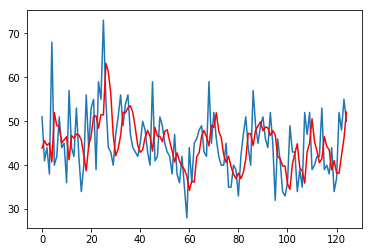

In [201]:
X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()